# Set Up

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/images.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/PolySci%20%26%20Law/Fakeddit/labels.csv"
image_data = np.load('images.npy',allow_pickle=True)
labels = pd.read_csv('labels.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


images.npy          100%[===================>]   1.06G  54.2MB/s    in 26s     
labels.csv          100%[===================>]  74.51K  --.-KB/s    in 0.001s  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
labels.head()

,Unnamed: 0,author,clean_title,created_utc,domain,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,growingivy,sweet spider statue in des moines ia,1.570132e+09,i.redd.it,6.0,17,mildlyinteresting,"Sweet spider statue in Des Moines, IA.",0.84,1,0,0
1,1,tedman1990,why dont you take a photo it lasts longer,1.414077e+09,NaN,NaN,48,psbattle_artwork,"Why don't you take a photo, it lasts longer.",NaN,0,2,4
2,2,EarlESquirt,i was wondering what would beak first,1.388052e+09,NaN,NaN,360,psbattle_artwork,"""I was wondering what would beak first...""",NaN,0,2,4
3,3,Panzerpup,lt george h w bush is shot down by the japanese,1.527452e+09,i.redd.it,1.0,11,fakehistoryporn,Lt. George H. W. Bush is shot down by the Japa...,0.93,0,2,2
4,4,ApiContraption,NaN,1.530592e+09,NaN,NaN,1,psbattle_artwork,NaN,NaN,0,2,4


Drive loaded data

In [ ]:
all_train = pd.read_csv('/content/drive/MyDrive/Data Science/Fakeddit/all_train.tsv', sep='\t')

In [ ]:
all_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,NaN,NaN,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,1,1,155885.0,714550.0,RickSisco,NaN,1.443822e+09,NaN,True,cvm5uy4,http://i.imgur.com/yxrkYT8.jpg,3n7fld,NaN,5,psbattle_artwork,NaN,NaN,0,2,4
2,2,2,NaN,NaN,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
3,3,3,NaN,NaN,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
4,4,4,282323.0,1228398.0,NaN,NaN,1.378792e+09,NaN,True,cc5cbon,http://i.imgur.com/M8KTWMx.jpg,1lz1q0,NaN,3,psbattle_artwork,NaN,NaN,0,2,4


In [ ]:
all_train = all_train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'id', 'linked_submission_id', 'hasImage', 'image_url', 'author'])

# Null Value Processing

In [ ]:
all_train.head()

,clean_title,created_utc,domain,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,NaN,1.443822e+09,NaN,NaN,5,psbattle_artwork,NaN,NaN,0,2,4
2,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
3,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
4,NaN,1.378792e+09,NaN,NaN,3,psbattle_artwork,NaN,NaN,0,2,4


In [ ]:
all_train.isnull().sum()

clean_title      75429
created_utc          0
domain          242100
num_comments    242100
score                0
subreddit            0
title            73840
upvote_ratio    242100
2_way_label          0
3_way_label          0
6_way_label          0
dtype: int64

In [ ]:
all_train = all_train.dropna()

In [ ]:
X = all_train.drop(columns=['2_way_label', '3_way_label',	'6_way_label'])
y = all_train[['2_way_label', '3_way_label',	'6_way_label']]

In [ ]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (634932, 8)
y shape: (634932, 3)


 # Numerical Data Processing

In [ ]:
print(X['subreddit'].nunique())
print('ratio:', X['subreddit'].nunique() / X.shape[0])

21
ratio: 3.307440796809737e-05


In [ ]:
print(X['domain'].nunique())
print('ratio:', X['domain'].nunique() / X.shape[0])

20627
ratio: 0.032486943483711644


In [ ]:
categorical_subreddit = pd.get_dummies(X.subreddit, prefix='subreddit')
print(categorical_subreddit.head())

   subreddit_confusing_perspective  subreddit_fakealbumcovers  \
0                                0                          0   
2                                0                          0   
3                                0                          0   
5                                0                          0   
6                                0                          0   

   subreddit_fakefacts  subreddit_fakehistoryporn  \
0                    0                          0   
2                    0                          0   
3                    0                          0   
5                    0                          0   
6                    0                          0   

   subreddit_mildlyinteresting  subreddit_misleadingthumbnails  \
0                            1                               0   
2                            0                               0   
3                            0                               0   
5                         

In [ ]:
# categorical_domain = pd.get_dummies(X.domain, prefix='subreddit')
# print(categorical_domain.head())

In [ ]:
X = X.drop(columns=['domain'])

In [ ]:
X = pd.concat([X, categorical_subreddit], axis=1, join='inner')
X.head()

,clean_title,created_utc,num_comments,score,subreddit,title,upvote_ratio,subreddit_confusing_perspective,subreddit_fakealbumcovers,subreddit_fakefacts,...,subreddit_propagandaposters,subreddit_satire,subreddit_savedyouaclick,subreddit_subredditsimulator,subreddit_subsimulatorgpt2,subreddit_theonion,subreddit_upliftingnews,subreddit_usanews,subreddit_usnews,subreddit_waterfordwhispersnews
0,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,this concerned sink with a tiny hat,1.534727e+09,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hackers leak emails from uae ambassador to us,1.496511e+09,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,this flower in my neighborhood,1.557764e+09,0.0,17,mildlyinteresting,This flower in my neighborhood,0.92,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,puppy taking in the view,1.471341e+09,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.drop(columns=['subreddit'])
X.head()

,clean_title,created_utc,num_comments,score,title,upvote_ratio,subreddit_confusing_perspective,subreddit_fakealbumcovers,subreddit_fakefacts,subreddit_fakehistoryporn,...,subreddit_propagandaposters,subreddit_satire,subreddit_savedyouaclick,subreddit_subredditsimulator,subreddit_subsimulatorgpt2,subreddit_theonion,subreddit_upliftingnews,subreddit_usanews,subreddit_usnews,subreddit_waterfordwhispersnews
0,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,2.0,12,My Walgreens offbrand Mucinex was engraved wit...,0.84,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,this concerned sink with a tiny hat,1.534727e+09,2.0,119,This concerned sink with a tiny hat,0.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hackers leak emails from uae ambassador to us,1.496511e+09,1.0,44,Hackers leak emails from UAE ambassador to US,0.92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,this flower in my neighborhood,1.557764e+09,0.0,17,This flower in my neighborhood,0.92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,puppy taking in the view,1.471341e+09,26.0,250,PsBattle: Puppy taking in the view,0.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.columns

Index(['clean_title', 'created_utc', 'num_comments', 'score', 'title',
       'upvote_ratio', 'subreddit_confusing_perspective',
       'subreddit_fakealbumcovers', 'subreddit_fakefacts',
       'subreddit_fakehistoryporn', 'subreddit_mildlyinteresting',
       'subreddit_misleadingthumbnails', 'subreddit_neutralnews',
       'subreddit_nottheonion', 'subreddit_pareidolia',
       'subreddit_photoshopbattles', 'subreddit_pic',
       'subreddit_propagandaposters', 'subreddit_satire',
       'subreddit_savedyouaclick', 'subreddit_subredditsimulator',
       'subreddit_subsimulatorgpt2', 'subreddit_theonion',
       'subreddit_upliftingnews', 'subreddit_usanews', 'subreddit_usnews',
       'subreddit_waterfordwhispersnews'],
      dtype='object')

# NLP Processing

In [ ]:
from random import randint

Using the short version of the dataset for NLP processing

In [ ]:
labels.shape

(521, 13)

In [ ]:
labels.head()

,Unnamed: 0,author,clean_title,created_utc,domain,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,growingivy,sweet spider statue in des moines ia,1.570132e+09,i.redd.it,6.0,17,mildlyinteresting,"Sweet spider statue in Des Moines, IA.",0.84,1,0,0
1,1,tedman1990,why dont you take a photo it lasts longer,1.414077e+09,NaN,NaN,48,psbattle_artwork,"Why don't you take a photo, it lasts longer.",NaN,0,2,4
2,2,EarlESquirt,i was wondering what would beak first,1.388052e+09,NaN,NaN,360,psbattle_artwork,"""I was wondering what would beak first...""",NaN,0,2,4
3,3,Panzerpup,lt george h w bush is shot down by the japanese,1.527452e+09,i.redd.it,1.0,11,fakehistoryporn,Lt. George H. W. Bush is shot down by the Japa...,0.93,0,2,2
4,4,ApiContraption,NaN,1.530592e+09,NaN,NaN,1,psbattle_artwork,NaN,NaN,0,2,4


In [ ]:
for i in range(7):
  index_val = randint(0,521)
  print('Normal Title:', labels['title'][index_val])
  print('Cleaned Title:', labels['clean_title'][index_val])
  print('-'*50)

Normal Title: "Again?" Democratic Party Poster, South Korea, 2016
Cleaned Title: again democratic party poster south korea
--------------------------------------------------
Normal Title: PsBattle: Dog having a cold swim
Cleaned Title: dog having a cold swim
--------------------------------------------------
Normal Title: PsBattle: snowman with legs
Cleaned Title: snowman with legs
--------------------------------------------------
Normal Title: Robot Devil (Futurama)
Cleaned Title: robot devil futurama
--------------------------------------------------
Normal Title: Chancellor Merkel (x-post /r/4chan)
Cleaned Title: chancellor merkel
--------------------------------------------------
Normal Title: Liking the new hairdo
Cleaned Title: liking the new hairdo
--------------------------------------------------
Normal Title: Saunas, bars and cable TV: luxury world discovered inside Mexican riot prison
Cleaned Title: saunas bars and cable tv luxury world discovered inside mexican riot prison

In [ ]:
title_data = labels[['clean_title', '2_way_label', '3_way_label', '6_way_label']].dropna()

In [ ]:
title_data.shape

(465, 4)

In [ ]:
title_texts = title_data['clean_title']
title_labels = title_data[['2_way_label', '3_way_label', '6_way_label']]

In [ ]:
title_texts.isnull().sum()

0

In [ ]:
title_labels.isnull().sum()

2_way_label    0
3_way_label    0
6_way_label    0
dtype: int64

In [ ]:
for i in range(7):
  index_val = randint(0,465)
  print('Title:', title_texts[index_val])
  print('Label: ', title_labels['6_way_label'][index_val])
  print('-'*50)

Title: the whales on my friends beer foam
Label:  2
--------------------------------------------------
Title: other discussions
Label:  4
--------------------------------------------------
Title: a spider crawled into my taillight and died
Label:  0
--------------------------------------------------
Title: hitchhikers bread
Label:  4
--------------------------------------------------
Title: garbage collectors open library with abandoned books
Label:  0
--------------------------------------------------
Title: scolded
Label:  4
--------------------------------------------------
Title: colorado deputy drove through the bomb cyclone to help save a newborns life
Label:  0
--------------------------------------------------


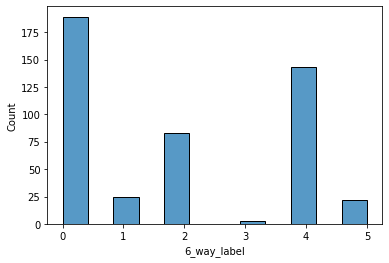

In [ ]:
sns.histplot(title_labels['6_way_label'], bins = 12)

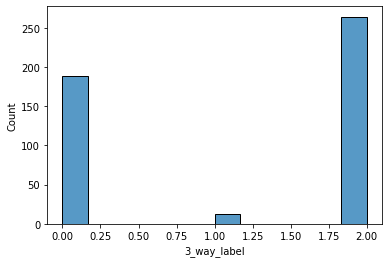

In [ ]:
sns.histplot(title_labels['3_way_label'], bins = 12)

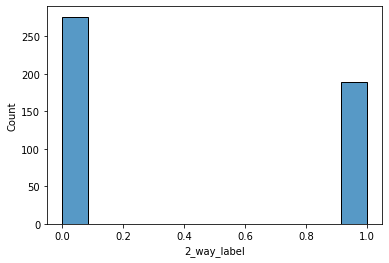

In [ ]:
sns.histplot(title_labels['2_way_label'], bins = 12)

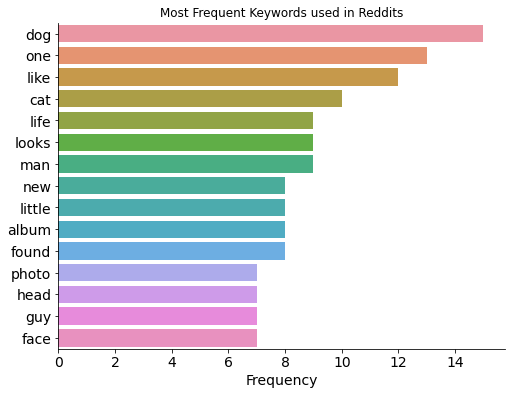

In [ ]:
from collections import Counter
import string

stpwrds = stopwords.words('english')
punctuation = string.punctuation

num_words = 15

text = " ".join(title_texts)

text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Reddits");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(title_texts, title_labels, test_size=0.2, random_state=9)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(372,)
(372, 3)
(93,)
(93, 3)


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def process_lang_data(text):
  '''Tokenize the text, remove stopwards, go through lemmatization, and remove punctuation'''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  for token in word_tokenize(text):
    if token not in punctuation and token not in our_stopwords:
      clipped_token = lemmatizer.lemmatize(token)
      cleaned_text.append(clipped_token)

  return cleaned_text

## CountVectorizer

Uses one-hot encoding combined to make a bag of words model. Vectors from this are the length of the overall vocabulary, and the number in each location in the vector corresponds to how many times the associated words appears in a sentence

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # 1000 to 250

bow.fit(X_train) # fitting to our training data

bow_train = bow.transform(X_train).toarray() # then transforming both training and testing data
bow_test = bow.transform(X_test).toarray()

## TF-IDF

TF-IDF = Term Frequency Inverse Document Frequency. It includes information about the individual word, the document, and the overall corpus of words. 

Term Frequency calculates the probability of a word being in a document. If a term frequency for a word in a document is high, it means the word appears frequently in that document.

Inverse Document Frequency says how frequently the word is in the entire corpus. If Inverse Document Frequency is low, implies the word is frequent in the corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=process_lang_data, max_features=1000)

tfidf.fit(X_train)

tfidf_train = tfidf.transform(X_train).toarray()
tfidf_test = tfidf.transform(X_test).toarray()

## Word2Vec

Here, each word is converted into its own embedding vector. Word vectors are created such that words that share common contexts in the corpus are located close to one another in the space.

In [ ]:
import gensim
# have to pre-tokenize
tokenize = title_texts.apply(process_lang_data)

# take a look at the documentation to see what these parameters are changing!
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize, total_examples = len(title_texts),epochs=20)

(42261, 43460)

In [ ]:
words = list(w2vec_model.wv.vocab)
print(words)

['sweet', 'spider', 'statue', 'de', 'moines', 'ia', 'dont', 'take', 'photo', 'last', 'longer', 'wondering', 'would', 'beak', 'first', 'lt', 'george', 'h', 'w', 'bush', 'shot', 'japanese', 'life', 'heartwarming', 'mother', 'claimed', 'son', 'joined', 'isi', 'people', 'wouldnt', 'know', 'blew', 'accident', 'whistleblower', 'disrupt', 'american', 'politics', 'happy', 'day', 'gay', 'marriage', 'seattle', 'gary', 'johnson', 'poll', 'libertarian', 'candidate', 'making', 'major', 'inroad', 'latino', 'voter', 'grows', 'closer', 'percent', 'threshold', 'join', 'debate', 'light', 'liam', 'bride', 'groom', 'reaction', 'maroon', 'crashing', 'wedding', 'least', 'heineken', 'wheel', 'cheese', 'bad', 'got', 'dollar', 'buying', 'snack', 'straw', 'came', 'closed', 'end', 'head', 'reeeee', 'taken', 'second', 'death', 'tupac', 'shakur', 'c', 'deepdream', 'old', 'nonelectric', 'shavertrimmer', 'belonged', 'grandfather', 'dog', 'cold', 'swim', 'president', 'obama', 'want', 'new', 'car', 'smell', 'campaign'

In [ ]:
X = w2vec_model[w2vec_model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Word2Vec - Spacy

Pre-trained Word2Vec

In [ ]:
import spacy
from spacy.lang.en.examples import sentences 
from spacy.lang.en.stop_words import STOP_WORDS

text_to_nlp = spacy.load("en_core_web_sm") # loading in the model

In [ ]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): 
          # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token)
    return np.array(clean_tokens)

In [ ]:
def sum_vectors():
  '''
    Returns the sum of the embedding vectors
  '''
  tokenized_vectors = title_texts.apply(tokenize_vecs)
  return np.array(tokenized_vectors.apply(lambda x: np.sum([w.vector for w in x])))

In [ ]:
def sum_and_avg_vectors():
  '''
    Returns the sum of the embedding vectors
  '''
  tokenized_vectors = title_texts.apply(tokenize_vecs)
  return np.array(tokenized_vectors.apply(lambda x: np.sum([w.vector for w in x])/len(x)))

# CV Processing

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
image_data.shape

(521,)

In [ ]:
labels

,Unnamed: 0,author,clean_title,created_utc,domain,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,growingivy,sweet spider statue in des moines ia,1.570132e+09,i.redd.it,6.0,17,mildlyinteresting,"Sweet spider statue in Des Moines, IA.",0.84,1,0,0
1,1,tedman1990,why dont you take a photo it lasts longer,1.414077e+09,NaN,NaN,48,psbattle_artwork,"Why don't you take a photo, it lasts longer.",NaN,0,2,4
2,2,EarlESquirt,i was wondering what would beak first,1.388052e+09,NaN,NaN,360,psbattle_artwork,"""I was wondering what would beak first...""",NaN,0,2,4
3,3,Panzerpup,lt george h w bush is shot down by the japanese,1.527452e+09,i.redd.it,1.0,11,fakehistoryporn,Lt. George H. W. Bush is shot down by the Japa...,0.93,0,2,2
4,4,ApiContraption,NaN,1.530592e+09,NaN,NaN,1,psbattle_artwork,NaN,NaN,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,516,hasangetinya,mom to the rescue dog saves her puppies from d...,1.450952e+09,rt.com,2.0,20,upliftingnews,Mom to the rescue: Dog saves her puppies from ...,0.83,1,0,0
517,517,Bira_Boshikage,this shop sells middle finger bottles,1.535818e+09,i.redd.it,3.0,12,mildlyinteresting,This shop sells middle finger bottles,0.81,1,0,0
518,518,quadroplegic,sit in my lap,1.406559e+09,i.imgur.com,0.0,2,pareidolia,Sit in my lap,0.67,0,2,2
519,519,DrWankalot,fuck u baby china number one,1.457354e+09,NaN,NaN,1367,psbattle_artwork,"FUCK U BABY, CHINA NUMBER ONE!",NaN,0,2,4


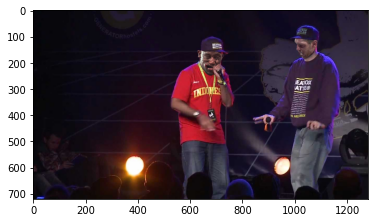

In [ ]:
plt.imshow(image_data[353])

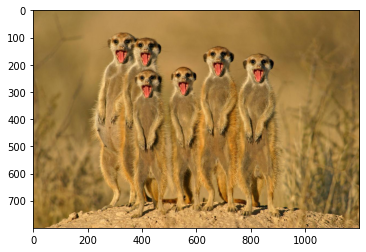

In [ ]:
plt.imshow(image_data[124])

In [ ]:
image_data[124][]

array([[151, 121,  67],
       [151, 121,  67],
       [151, 121,  67],
       ...,
       [134, 102,  53],
       [134, 102,  53],
       [134, 102,  53]], dtype=uint8)

In [ ]:
width_sum = 0
height_sum = 0
for image in image_data:
  height_sum += image.shape[0]
  width_sum += image.shape[1]
print('Avg Height:', height_sum/521)
print('Avg Width:', width_sum/521)

Avg Height: 599.2456813819578
Avg Width: 657.1765834932821
